<a href="https://colab.research.google.com/github/vinay-500/pytorch_starter/blob/main/pytorch_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [99]:
class Model(nn.Module):
  def __init__(self, in_features = 4, h1=8, h2 = 9, out_features =3 ):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [100]:
torch.manual_seed(41)

model = Model()

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"

In [103]:
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [104]:
df['species'] = df['species'].replace('setosa', 0.0)
df['species'] = df['species'].replace('versicolor', 1.0)
df['species'] = df['species'].replace('virginica', 2.0)


In [105]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [106]:
X = df.drop('species', axis = 1)
y = df['species']

In [107]:
X = X.values
y = y.values

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [110]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [111]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [112]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [113]:
epochs = 200

losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f"Epoch {i} and loss {loss}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss 1.1251550912857056
Epoch 10 and loss 1.0096259117126465
Epoch 20 and loss 0.8157405853271484
Epoch 30 and loss 0.585706353187561
Epoch 40 and loss 0.3999636471271515
Epoch 50 and loss 0.26768800616264343
Epoch 60 and loss 0.17942361533641815
Epoch 70 and loss 0.12151690572500229
Epoch 80 and loss 0.0860118493437767
Epoch 90 and loss 0.06520850956439972
Epoch 100 and loss 0.05286576226353645
Epoch 110 and loss 0.04508381709456444
Epoch 120 and loss 0.03979949280619621
Epoch 130 and loss 0.035970740020275116
Epoch 140 and loss 0.03293721750378609
Epoch 150 and loss 0.03041938506066799
Epoch 160 and loss 0.026795217767357826
Epoch 170 and loss 0.02338254824280739
Epoch 180 and loss 0.020531881600618362
Epoch 190 and loss 0.018495969474315643


Text(0.5, 0, 'epochs')

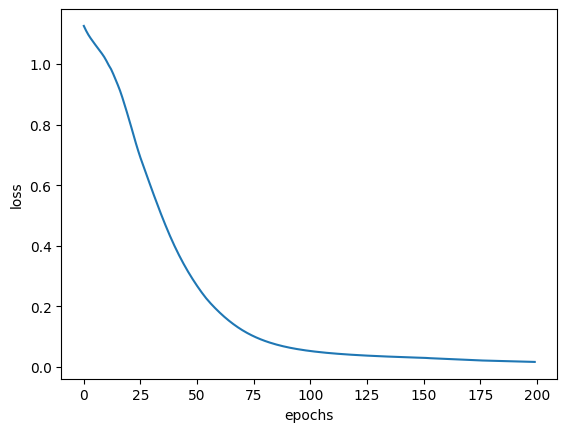

In [114]:
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epochs")
